In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
app_df = pd.read_csv(r"C:\Users\magak\Desktop\Projects\Google Apps AB Testing\Dataset\googleplaystore.csv")
app_df.head()


,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up


In [11]:
app_df.shape

(10841, 14)

In [ ]:
app_df.info()

In [ ]:
app_df.isna().sum()

Data Cleaning

In [4]:
# Check for missing values
app_df.isnull().sum()

#Handling the missing values
app_df['Rating'] = app_df['Rating'].fillna(app_df['Rating'].mean())

In [5]:
# Drop the missing values
app_df.dropna(inplace = True)

In [6]:
#Convert the Reviews to numerical
app_df['Reviews'] = app_df['Reviews'].astype(int)

# Remove the dollar sign from Price and convert to float
app_df['Price'] = app_df['Price'].apply(lambda x: str(x).replace('$', '') if '$' in str(x) else str(x))

app_df['Price'] = app_df['Price'].apply(lambda x: float(x))

# Let's convert the Last Updated to datetime
app_df['Last Updated'] = pd.to_datetime(app_df['Last Updated'])

# Check the unique values of the Installs
app_df['Installs'].unique()

# Let's remove the '+' and ',' from the Installs and convert to integer
app_df['Installs'] = app_df['Installs'].apply(lambda x: str(x).replace('+', '') if '+' in str(x) else str(x))

app_df['Installs'] = app_df['Installs'].apply(lambda x: str(x).replace(',', '') if ',' in str(x) else str(x))

app_df['Installs'] = app_df['Installs'].apply(lambda x: int(x))

C:\Users\magak\AppData\Local\Temp\ipykernel_8048\1205131500.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  app_df['Last Updated'] = pd.to_datetime(app_df['Last Updated'])


In [7]:
#Removing irrelevant columns
app_df.drop(['Android Ver', 'Current Ver'], axis=1, inplace=True)

Data Transformation

In [ ]:
# Reviews Bins and labels
bins = [0, 1000, 100000, app_df['Reviews'].max()]
labels = ['Low', 'Medium', 'High']

# Creating the Reviews Category column
app_df['Reviews Category'] = pd.cut(app_df['Reviews'], bins=bins, labels=labels, include_lowest=True)


# Rating Bins and labels
bins = [0, 2, 3, 4, 5]
labels = ['Poor', 'Average', 'Good', 'Excellent']

# Creating the Rating Category column
app_df['Rating Category'] = pd.cut(app_df['Rating'], bins=bins, labels=labels, include_lowest=True)

# Installs Bins and labels
bins = [0, 10000, 100000, 1000000, app_df['Installs'].max()]
labels = ['Low', 'Medium', 'High', 'Very High']

# Creating the Installs Category column
app_df['Installs Category'] = pd.cut(app_df['Installs'], bins=bins, labels=labels, include_lowest=True)

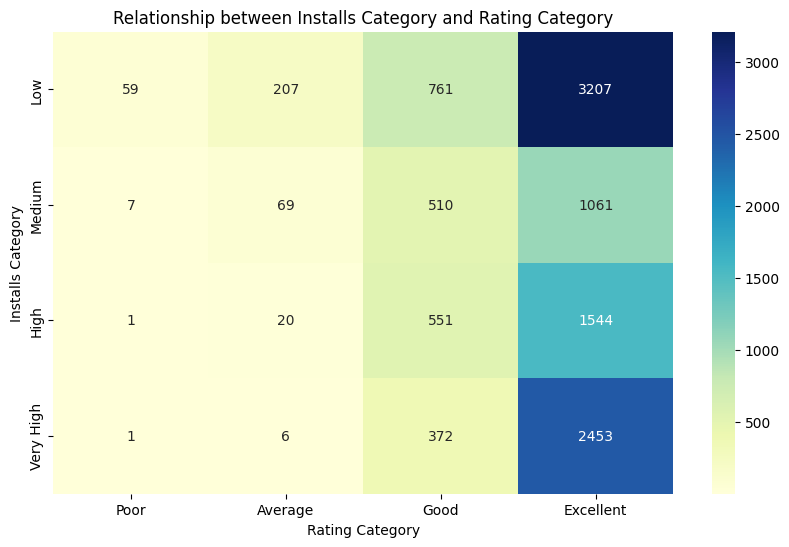

In [11]:
# Create a crosstab to analyze the relationship between Installs Category and Rating Category
crosstab = pd.crosstab(app_df['Installs Category'], app_df['Rating Category'])

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(crosstab, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Relationship between Installs Category and Rating Category')
plt.xlabel('Rating Category')
plt.ylabel('Installs Category')
plt.show()

In [12]:
# Number of apps with Excellent rating and Low installations
excellent_low = crosstab.loc['Low', 'Excellent']

# Total number of apps with Low installations
total_low = crosstab.loc['Low'].sum()

#Percentage
percentage_excellent_low = (excellent_low / total_low) * 100

percentage_excellent_low

np.float64(75.74397732640529)

Noticed that there is a huge percentage of excellent rating that have low installations. Why?? What does this mean? 

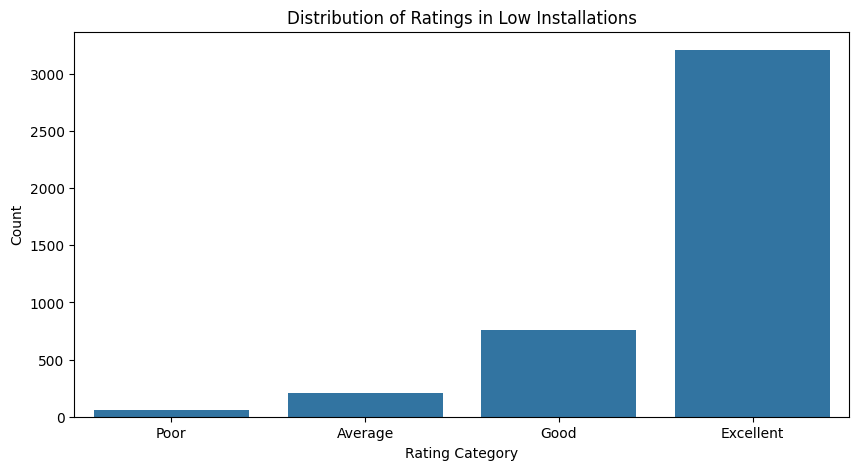

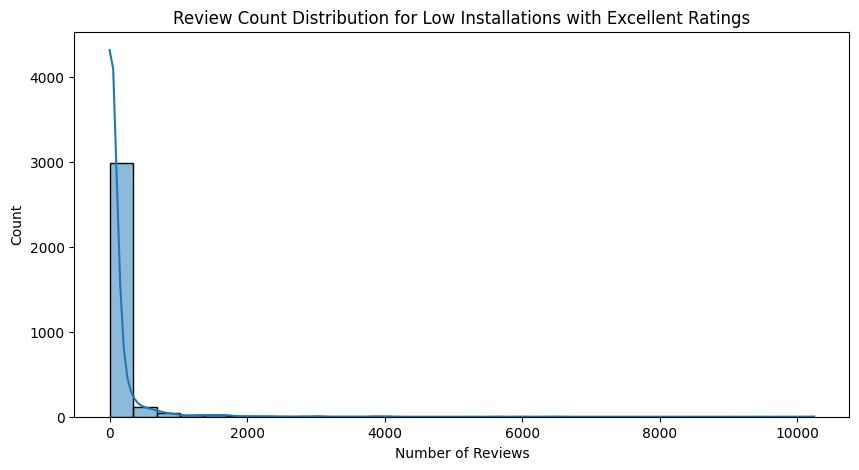

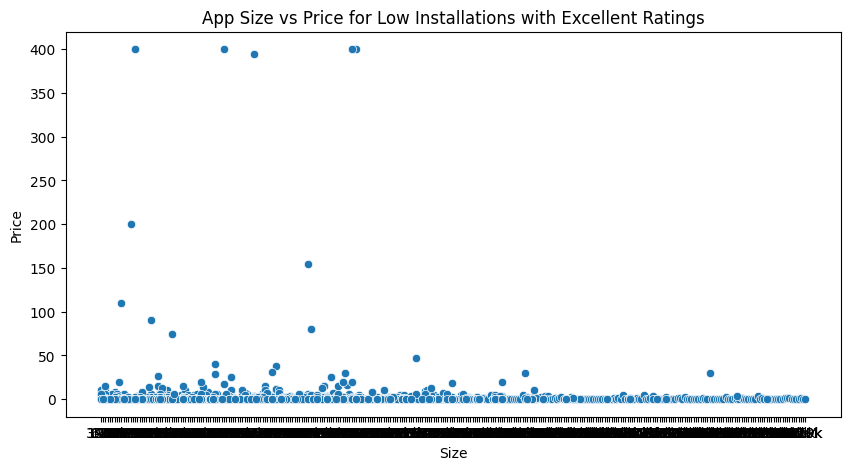

In [13]:
# Distribution of Ratings in Low Installations
low_install_ratings = app_df[app_df['Installs Category'] == 'Low']['Rating Category'].value_counts()
plt.figure(figsize=(10, 5))
sns.barplot(x=low_install_ratings.index, y=low_install_ratings.values)
plt.title('Distribution of Ratings in Low Installations')
plt.xlabel('Rating Category')
plt.ylabel('Count')
plt.show()


# Review Count Analysis
low_install_reviews = app_df[(app_df['Installs Category'] == 'Low') & (app_df['Rating Category'] == 'Excellent')]['Reviews']
plt.figure(figsize=(10, 5))
sns.histplot(low_install_reviews, bins=30, kde=True)
plt.title('Review Count Distribution for Low Installations with Excellent Ratings')
plt.xlabel('Number of Reviews')
plt.ylabel('Count')
plt.show()

# App Size and Price Analysis
low_install_size_price = app_df[(app_df['Installs Category'] == 'Low') & (app_df['Rating Category'] == 'Excellent')][['Size', 'Price']]
plt.figure(figsize=(10, 5))
sns.scatterplot(x='Size', y='Price', data=low_install_size_price)
plt.title('App Size vs Price for Low Installations with Excellent Ratings')
plt.xlabel('Size')
plt.ylabel('Price')
plt.show()

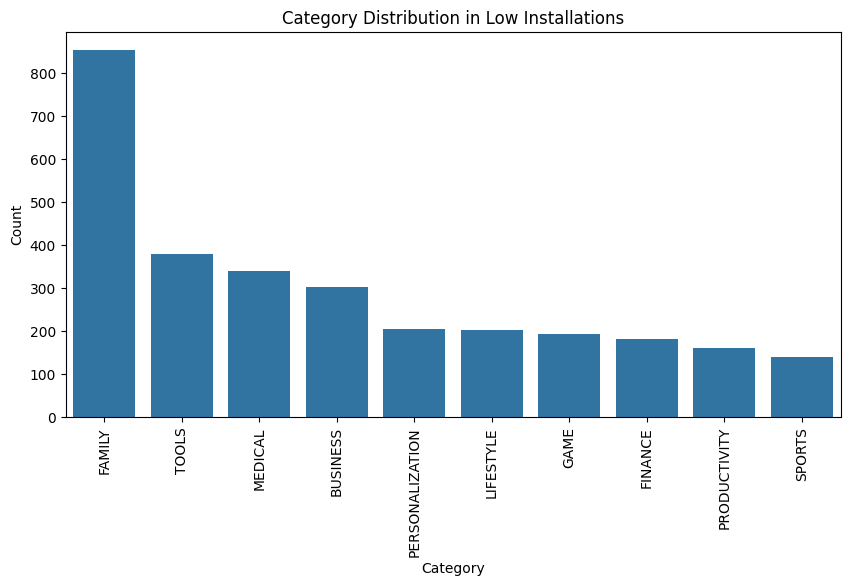

In [14]:
low_install_categories = app_df[app_df['Installs Category'] == 'Low']['Category'].value_counts().head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=low_install_categories.index, y=low_install_categories.values)
plt.title('Category Distribution in Low Installations')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

User Segmentation

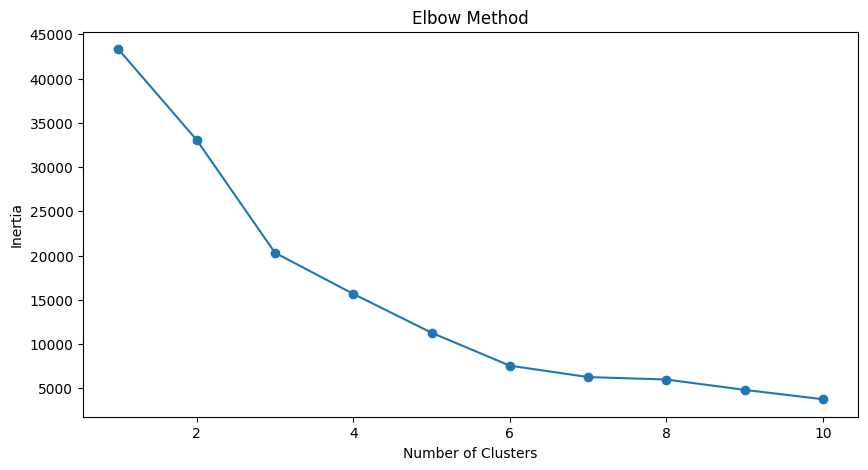

In [67]:
#User segmentation based on performance metrics  using k-means clustering
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select the necessary columns
user_metrics = app_df[['Rating', 'Reviews', 'Installs', 'Price']]
scaler = StandardScaler()
user_metrics_scaled = scaler.fit_transform(user_metrics)

#Elbow Method
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(user_metrics_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

Optimal clusters is 3

In [68]:
# KMeans with the optimal number of clusters
optimal_kmeans = KMeans(n_clusters=3, random_state=0)
app_df['Cluster'] = optimal_kmeans.fit_predict(user_metrics_scaled)

# Check the cluster centers
cluster_centers = scaler.inverse_transform(optimal_kmeans.cluster_centers_)
cluster_centers_df = pd.DataFrame(cluster_centers, columns=user_metrics.columns)

cluster_centers_df

,Rating,Reviews,Installs,Price
0,4.191053,2.447460e+05,7.700303e+06,3.992106e-01
1,3.921112,5.027222e+02,1.217222e+04,3.813800e+02
2,4.321849,1.846857e+07,7.168067e+08,-2.220446e-16


Cluster 0: Moderately popular and low-priced apps.<br> 
Apps that are moderately popular, with a good rating (4.19), a substantial number of reviews (around 244,746), and millions of installs (7.7 million). The apps tend to be priced very low, around 40 cents.

Cluster 1: Low-rated, low-review, expensive apps with fewer installs.<br> 
These apps tend to have lower ratings (3.92), very few reviews (502.7), and very few installs (around 12,172). However, they are highly priced, at around 381 dollars, indicating premium apps that may cater to niche or enterprise markets.

Cluster 2: Highly popular, highly rated, and free apps with massive user bases. <br>
This is the cluster for highly popular and well-rated apps, with the highest rating (4.32), a huge number of reviews (around 18 million), and the most installs by far (716.8 million). Most apps in this cluster are free.


In [70]:
# Actionable Insights for App Developers

# 1. Focus on User Reviews and Ratings
# Apps with higher ratings and more reviews tend to have higher installs.
# Developers should encourage users to leave reviews and ratings.

# 2. Pricing Strategy
# Cluster analysis shows that highly popular apps are mostly free.
# Consider offering a free version of the app to attract more users.

# 3. Improve App Quality
# Apps with excellent ratings but low installs might indicate niche markets or lack of visibility.
# Improve app quality and invest in marketing to increase visibility.

# 4. Target Specific Categories
# Certain categories like FAMILY, TOOLS, and MEDICAL have a high number of low-install apps.
# Developers in these categories should focus on differentiation and unique value propositions.

# 5. Optimize App Size
# Ensure the app size is optimized for better performance and user experience.
# Large app sizes might deter users from downloading.

# 6. Monitor Competitors
# Analyze competitors in the same category to understand their strategies and user feedback.
# Use this information to improve your app's features and user experience.

# 7. Leverage Data-Driven Decisions
# Use data analytics to continuously monitor app performance and user feedback.
# Make informed decisions based on data to improve app features and user satisfaction.

# Displaying the insights
insights = {
    "Focus on User Reviews and Ratings": "Encourage users to leave reviews and ratings.",
    "Pricing Strategy": "Consider offering a free version of the app to attract more users.",
    "Improve App Quality": "Invest in marketing and improve app quality to increase visibility.",
    "Target Specific Categories": "Focus on differentiation and unique value propositions in categories like FAMILY, TOOLS, and MEDICAL.",
    "Optimize App Size": "Ensure the app size is optimized for better performance and user experience.",
    "Monitor Competitors": "Analyze competitors to understand their strategies and user feedback.",
    "Leverage Data-Driven Decisions": "Use data analytics to continuously monitor app performance and user feedback."
}

for key, value in insights.items():
    print(f"{key}: {value}")

Focus on User Reviews and Ratings: Encourage users to leave reviews and ratings.
Pricing Strategy: Consider offering a free version of the app to attract more users.
Improve App Quality: Invest in marketing and improve app quality to increase visibility.
Target Specific Categories: Focus on differentiation and unique value propositions in categories like FAMILY, TOOLS, and MEDICAL.
Optimize App Size: Ensure the app size is optimized for better performance and user experience.
Monitor Competitors: Analyze competitors to understand their strategies and user feedback.
Leverage Data-Driven Decisions: Use data analytics to continuously monitor app performance and user feedback.


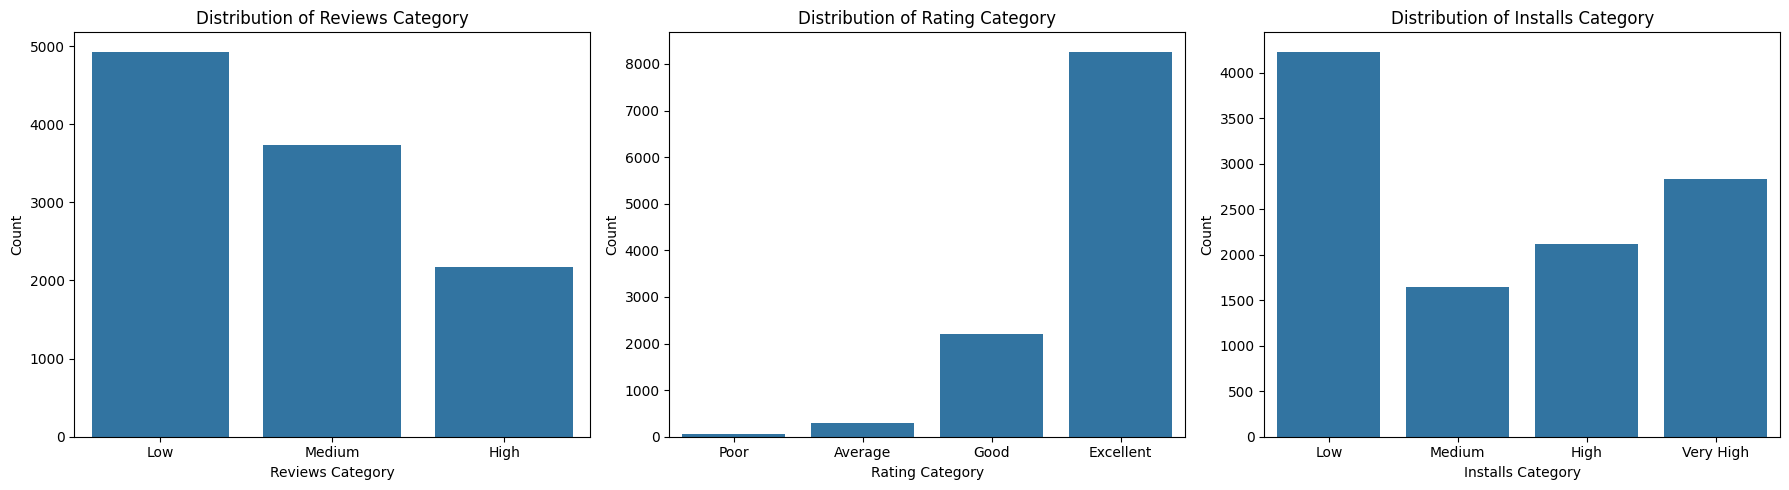

In [16]:
# Distribution of apps across Reviews Category, Rating Category, and Installs Category
plt.figure(figsize=(18, 5))

# Reviews Category distribution
plt.subplot(1, 3, 1)
reviews_category_dist = app_df['Reviews Category'].value_counts()
sns.barplot(x=reviews_category_dist.index, y=reviews_category_dist.values)
plt.title('Distribution of Reviews Category')
plt.xlabel('Reviews Category')
plt.ylabel('Count')

# Rating Category distribution
plt.subplot(1, 3, 2)
rating_category_dist = app_df['Rating Category'].value_counts()
sns.barplot(x=rating_category_dist.index, y=rating_category_dist.values)
plt.title('Distribution of Rating Category')
plt.xlabel('Rating Category')
plt.ylabel('Count')

# Installs Category distribution
plt.subplot(1, 3, 3)
installs_category_dist = app_df['Installs Category'].value_counts()
sns.barplot(x=installs_category_dist.index, y=installs_category_dist.values)
plt.title('Distribution of Installs Category')
plt.xlabel('Installs Category')
plt.ylabel('Count')

plt.tight_layout()
plt.show()